# Solución Tarea 2: Matplotlib

## Analítica y Ciencia de Datos

## CIDE - Otoñ0 2015

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problema 1

### Parte 1

In [63]:
# Vamos a simular el modelo
N = 200
mu    = np.array([10,45])
corr = 0.9
Sigma = np.array([[corr,0.5],[0.2,corr]])
prexmat  = np.random.multivariate_normal(mu,Sigma,N)

#plt.scatter(xmat[:,0],xmat[:,1])
beta = np.array([0.2,2,-3]).reshape((3,1))
epsilon = np.random.randn(N,1)
# concatenemos x
xmat = np.concatenate((np.ones((N,1)),prexmat),axis=1)
# listos para simular el modelo
y = np.dot(xmat,beta) + epsilon
print y.shape

(200, 1)


### Parte 2

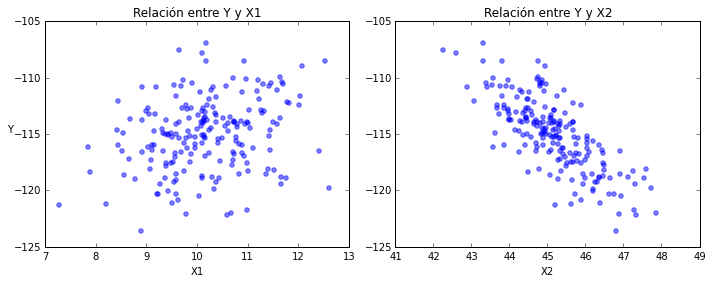

In [64]:
# vamos a hacer un subplot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(xmat[:,1], y, color='b', alpha=0.5)
plt.title(u'Relación entre Y y X1')
plt.ylabel('Y',rotation=0)
plt.xlabel('X1')
# segund subplot
plt.subplot(1,2,2)
plt.scatter(xmat[:,2], y, color='b', alpha=0.5)
plt.title(u'Relación entre Y y X2')
#plt.ylabel('Y')
plt.xlabel('X2')
plt.tight_layout()

### Parte 3
Estimación de OLS


In [65]:
# betahat
xtxinv = np.linalg.inv(np.dot(xmat.T,xmat))
betahat = np.dot(xtxinv,np.dot(xmat.T,y))
yhat    = np.dot(xmat,betahat)
resids  = y - yhat
sigma2  = np.dot(resids.T,resids)/(N-3)
vcv     = sigma2*xtxinv
betastd = np.sqrt(np.diag(vcv))
# para el pvalue necesitamos primer el estadístico t
tstat   = betahat.reshape((3,1))/betastd.reshape((3,1))
# Qué es el pvalue? Es el área bajo las colas utilizando el estadístico t como valor crítico
# necesitamos la cdf de una student
from scipy import stats
dof     = N-3
pval    = 2*(1-stats.t.cdf(np.abs(tstat),dof))

print betahat
print "---------------"
print pval
print "---------------"
print tstat



[[ 3.88663693]
 [ 2.10068411]
 [-3.10710595]]
---------------
[[ 0.21039518]
 [ 0.        ]
 [ 0.        ]]
---------------
[[  1.25657596]
 [ 26.76695071]
 [-42.55015947]]


### Parte 4

In [66]:
# contribuciones promedio normalizadas
x1_cont = np.mean(betahat[1]*xmat[:,1])
x2_cont = np.mean(betahat[2]*xmat[:,2])
suma_con = x1_cont + x2_cont
# normalicémoslas
x1_cont = x1_cont/suma_con
x2_cont = x2_cont/suma_con
print x1_cont, x2_cont


-0.179874637232 1.17987463723


([<matplotlib.axis.XTick at 0x10b886ad0>,
 <a list of 3 Text xticklabel objects>)

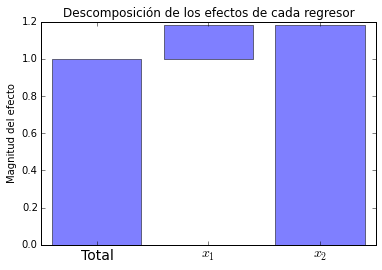

In [67]:
# Listos para hacer un gráfico de cascada: 
# Necesitamos tres barras:
# Primera barra: el 100%
plt.bar(1,1,align='center',alpha=0.5)
# Segunda barra: primer regresor:
plt.bar(2,x1_cont,bottom= x2_cont,align='center',alpha=0.5)
# Tercera barra: segundo regresor
plt.bar(3,x2_cont,align='center',alpha=0.5)
# Démosle formato:
# Título
plt.title(u'Descomposición de los efectos de cada regresor')
plt.ylabel('Magnitud del efecto')
# Etiquetas de X
plt.xticks([1,2,3],['Total','$x_1$','$x_2$'],fontsize=14)

### Parte 5: Resultados de la estimación

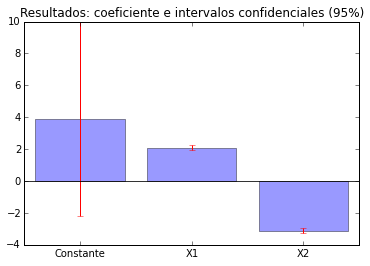

In [83]:
# simplemente tenemos que mostrar los coeficientes y los errores estándar con intervalos de confianza al 95%
plt.bar(np.arange(1,4), betahat, color='b', alpha=0.4, yerr= 1.96*betastd, ecolor='r',
           align='center')
# démosle formato:
plt.title(u'Resultados: coeficiente e intervalos confidenciales (95%)')
plt.xticks(np.arange(1,4),['Constante','X1','X2'])
# incluyamos una línea que pase por 0
plt.plot([0.5,3.5],[0,0], color='k', alpha=0.8)